# Loan Default Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install imblearn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv('Loan_default.csv')

df = pd.DataFrame(data)

In [4]:
#getting to know the data

df.shape

(255347, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
# Checking the presence of null values

df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# Checking the duplicate values

df.duplicated().sum()

0

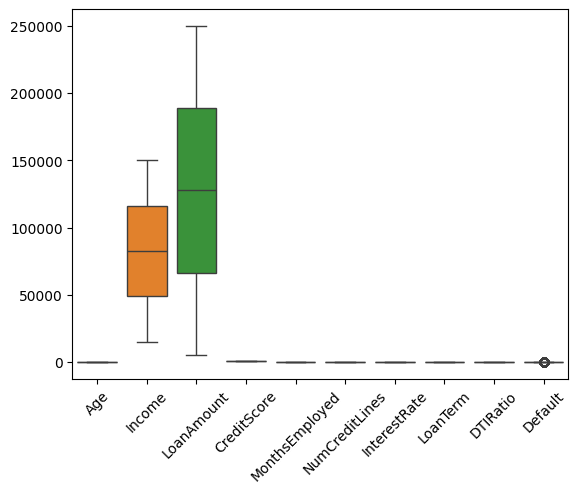

In [9]:
# Checking for outliers

sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [10]:
cols = df.select_dtypes(include=[np.number]).columns
outliers = {}
threshold = 3
for c in cols:
    mean = np.mean(df[c])
    std = np.std(df[c])
    vals = []
    for v in df[c]:
        z_score = (float(v) - mean)/std
        if np.abs(z_score) > threshold:
            vals.append(v)
    outliers[c] = vals

outliers

{'Age': [],
 'Income': [],
 'LoanAmount': [],
 'CreditScore': [],
 'MonthsEmployed': [],
 'NumCreditLines': [],
 'InterestRate': [],
 'LoanTerm': [],
 'DTIRatio': [],
 'Default': []}

In [11]:
#Categorical Columns Encoding

cat_cols = df.select_dtypes(include=['object'])
cat_cols

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,Bachelor's,Full-time,Married,No,No,Other,No
255343,98R4KDHNND,High School,Part-time,Divorced,No,No,Home,No
255344,XQK1UUUNGP,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,JAO28CPL4H,High School,Part-time,Single,Yes,Yes,Other,No


In [12]:
leb_cols = df.filter(like='Has', axis=1)
leb_cols

,HasMortgage,HasDependents,HasCoSigner
0,Yes,Yes,Yes
1,No,No,Yes
2,Yes,Yes,No
3,No,No,No
4,No,Yes,No
...,...,...,...
255342,No,No,No
255343,No,No,No
255344,Yes,Yes,Yes
255345,Yes,Yes,No


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for c in leb_cols:
    leb_cols[c] = le.fit_transform(leb_cols[c])

leb_cols

df[['HasMortgage','HasDependents','HasCoSigner']] = leb_cols

C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\2355199360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leb_cols[c] = le.fit_transform(leb_cols[c])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\2355199360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leb_cols[c] = le.fit_transform(leb_cols[c])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\2355199360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [14]:

ord_cols = [c for c in cat_cols if c not in leb_cols]
ord_cols = ord_cols[1:] 
ord_cols

['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

In [15]:
df['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

education_ord = ["High School","Bachelor's","Master's","PhD"]
emp_ord       = ['Unemployed','Full-time','Part-time','Self-employed']
married_ord   = ['Single','Married','Divorced']
purpose_ord   = ['Education','Auto','Home','Business','Other']


oe = OrdinalEncoder(categories=[education_ord, emp_ord, married_ord, purpose_ord])


df[ord_cols] = oe.fit_transform(df[ord_cols])


print(df[ord_cols].head())


   Education  EmploymentType  MaritalStatus  LoanPurpose
0        1.0             1.0            2.0          4.0
1        2.0             1.0            1.0          4.0
2        2.0             0.0            2.0          1.0
3        0.0             1.0            1.0          3.0
4        1.0             0.0            2.0          1.0


In [17]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,1.0,1.0,2.0,1,1,4.0,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2.0,1.0,1.0,0,0,4.0,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,2.0,1,1,1.0,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,0.0,1.0,1.0,0,0,3.0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,2.0,0,1,1.0,0,0


In [18]:
# Separating independent and dependant variables

x = df.iloc[:,1:-1]
y = df['Default']

In [19]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,1.0,2.0,1,1,4.0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,1.0,1.0,0,0,4.0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,2.0,1,1,1.0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,1.0,1.0,0,0,3.0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,2.0,0,1,1.0,0


In [20]:
# Performing Standard Scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

x

array([[ 0.83398951,  0.08969281, -1.08683299, ...,  0.99946362,
         1.41467457,  0.99978463],
       [ 1.70122109, -0.82302071, -0.04430887, ..., -1.00053667,
         1.41467457,  0.99978463],
       [ 0.1668883 ,  0.04385438,  0.02271487, ...,  0.99946362,
        -0.70846809, -1.00021542],
       ...,
       [ 0.83398951,  0.05956161,  1.13939142, ...,  0.99946362,
        -0.70846809,  0.99978463],
       [-0.09995219,  0.06697892, -0.94584033, ...,  0.99946362,
         1.41467457, -1.00021542],
       [ 1.23425024, -1.54201168, -1.54004788, ..., -1.00053667,
        -1.41618231,  0.99978463]])

In [21]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x, y)

print("Before UnderSampling:", y.value_counts().to_dict())
print("After UnderSampling:", y_res.value_counts().to_dict())

Before UnderSampling: {0: 225694, 1: 29653}
After UnderSampling: {0: 29653, 1: 29653}


In [22]:
# spliting the data set in training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression()

model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred = model.predict(x_test)

In [25]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
y_test

26164    0
44339    1
8479     0
47993    1
18618    0
        ..
56076    1
8850     0
49269    1
30407    1
31158    1
Name: Default, Length: 11862, dtype: int64

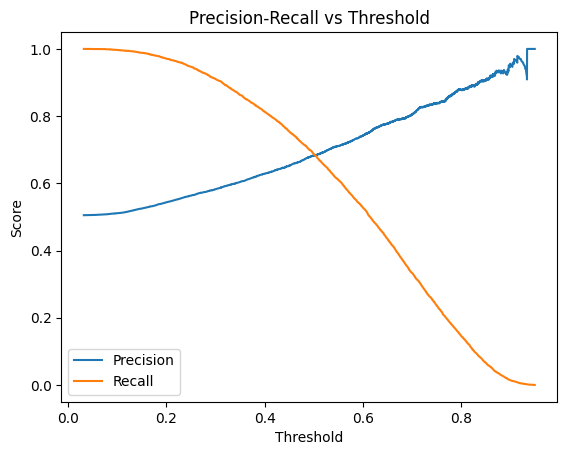

Confusion Matrix:
[[2479 3390]
 [ 821 5172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54      5869
           1       0.60      0.86      0.71      5993

    accuracy                           0.65     11862
   macro avg       0.68      0.64      0.63     11862
weighted avg       0.68      0.65      0.63     11862

Accuracy Score is : 0.6801551171809138


In [27]:
from sklearn.metrics import precision_recall_curve,confusion_matrix,accuracy_score,classification_report

y_probs = model.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()


custom_threshold = 0.35
y_pred_custom = (y_probs >= custom_threshold).astype(int)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))
print(f'Accuracy Score is : {accuracy_score(y_test,y_pred)}')

In [28]:
import joblib
joblib.dump(model, 'loanDefault.pkl')
joblib.dump(scaler, 'scaler.pkl')
feature_names = df.iloc[:,1:-1].columns.tolist()
joblib.dump(feature_names, 'columns.pkl')

['columns.pkl']